In [11]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [14]:
data= pd.read_csv("diabetes.csv")


In [17]:
data.shape


(768, 9)

In [19]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
data.duplicated().sum()


0

In [33]:
Replace_0 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[Replace_0] = data[Replace_0].replace(0, np.nan)


In [35]:
rows_to_drop = data[data.isnull().sum(axis=1) > 3].index
data.drop(rows_to_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

In [37]:
data.shape[0]


761

In [39]:
data.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.297571,110.873727,70.877339,27.235457,130.287879,30.859674,0.432261,31.285425
1,4.846442,142.422642,75.321429,33.000000,206.846154,35.406767,0.551584,37.093633


In [41]:
print("Value Counts:", data['Outcome'].value_counts())


Value Counts: Outcome
0    494
1    267
Name: count, dtype: int64


In [43]:
data.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    515
Age                          52
Outcome                       2
dtype: int64

In [45]:
data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [47]:
columns_fill = ['Glucose', 'BloodPressure', 'SkinThickness','BMI', 'Insulin', 'Age']
mean_values = data[columns_fill].mean()
data[columns_fill] = data[columns_fill].fillna(mean_values)

In [49]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

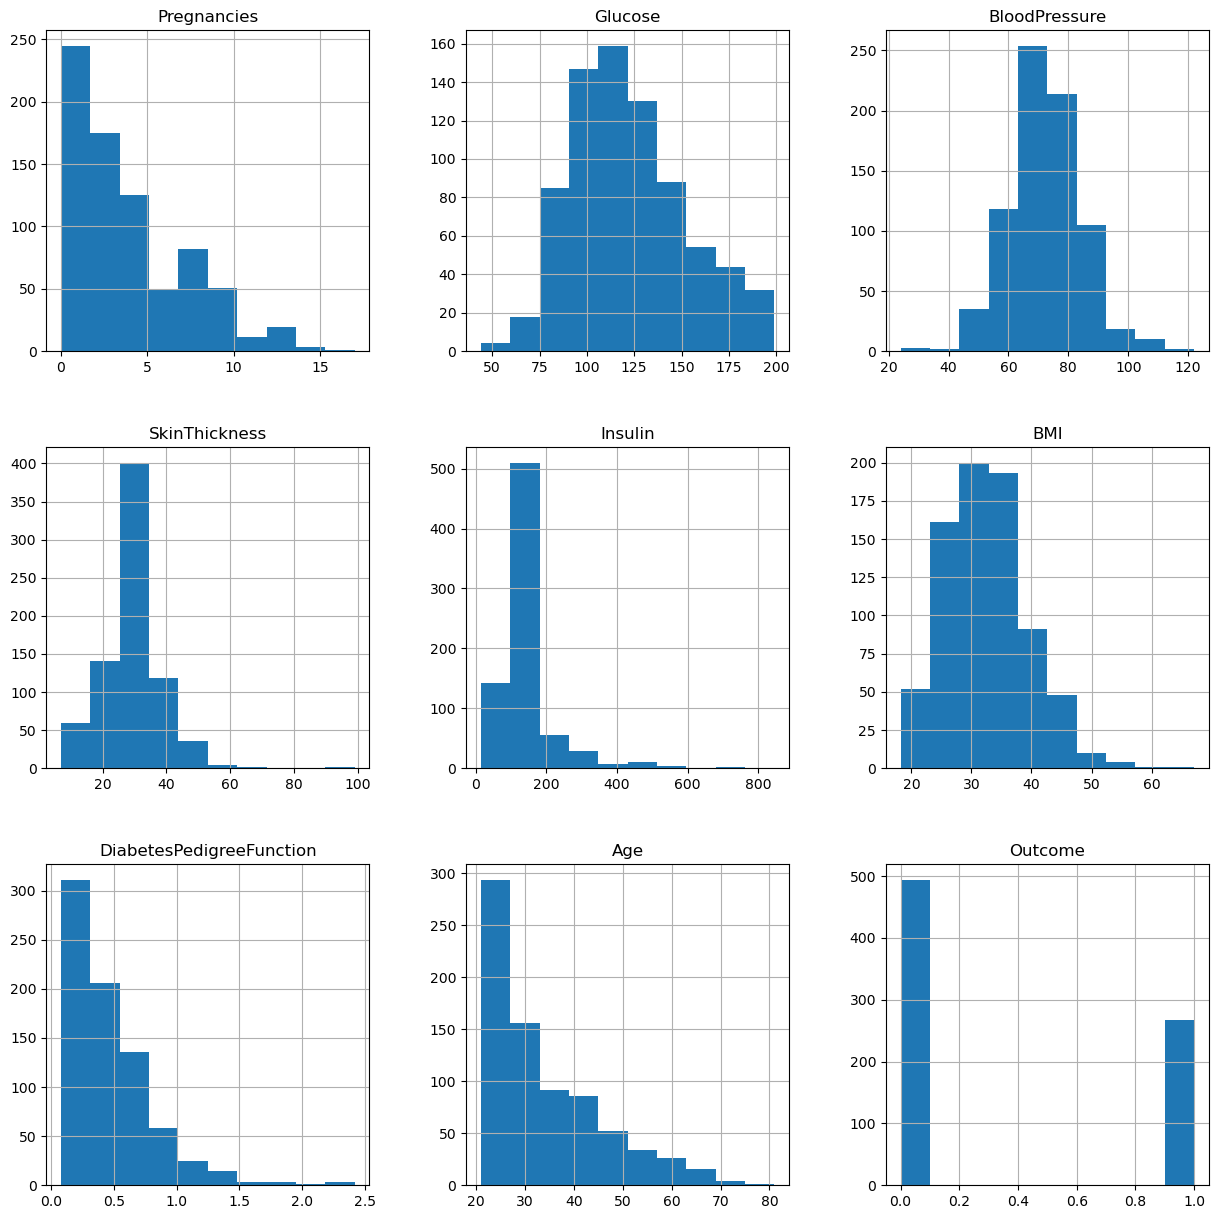

In [51]:
plots =data.hist(figsize=(15,15))


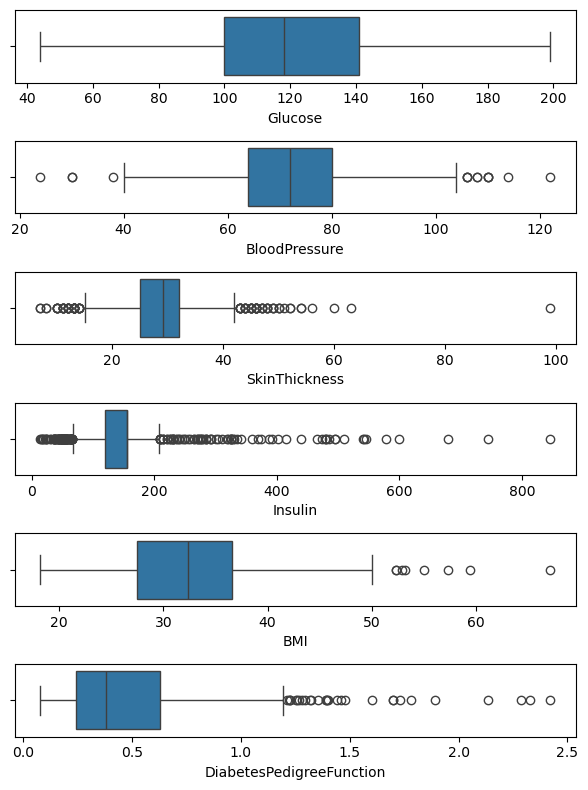

In [53]:
fig, axes = plt.subplots(6, 1, figsize=(6, 8))

sns.boxplot(x=data['Glucose'],ax=axes[0])
sns.boxplot(x=data['BloodPressure'],ax=axes[1])
sns.boxplot(x=data['SkinThickness'],ax=axes[2])
sns.boxplot(x=data['Insulin'],ax=axes[3])
sns.boxplot(x=data['BMI'],ax=axes[4])
sns.boxplot(x=data['DiabetesPedigreeFunction'],ax=axes[5])
plt.tight_layout()
plt.show()


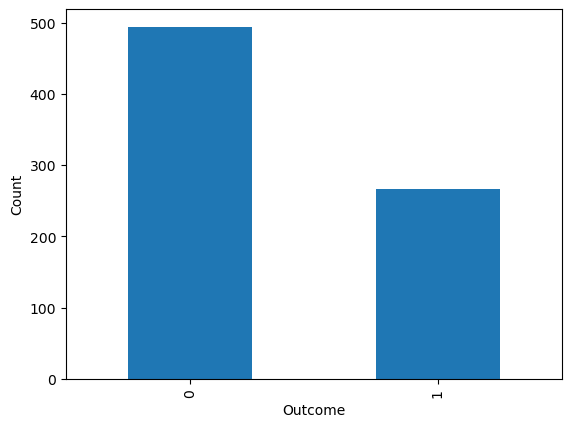

In [55]:
plots =data.Outcome.value_counts().plot(kind="bar")
plots.set_xlabel("Outcome")

plots.set_ylabel("Count")
plt.show()

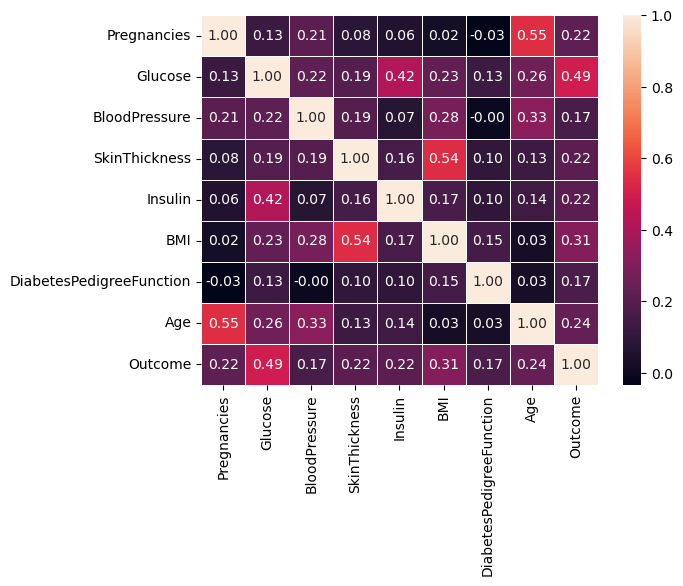

In [57]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", lw=0.5)
plt.show()

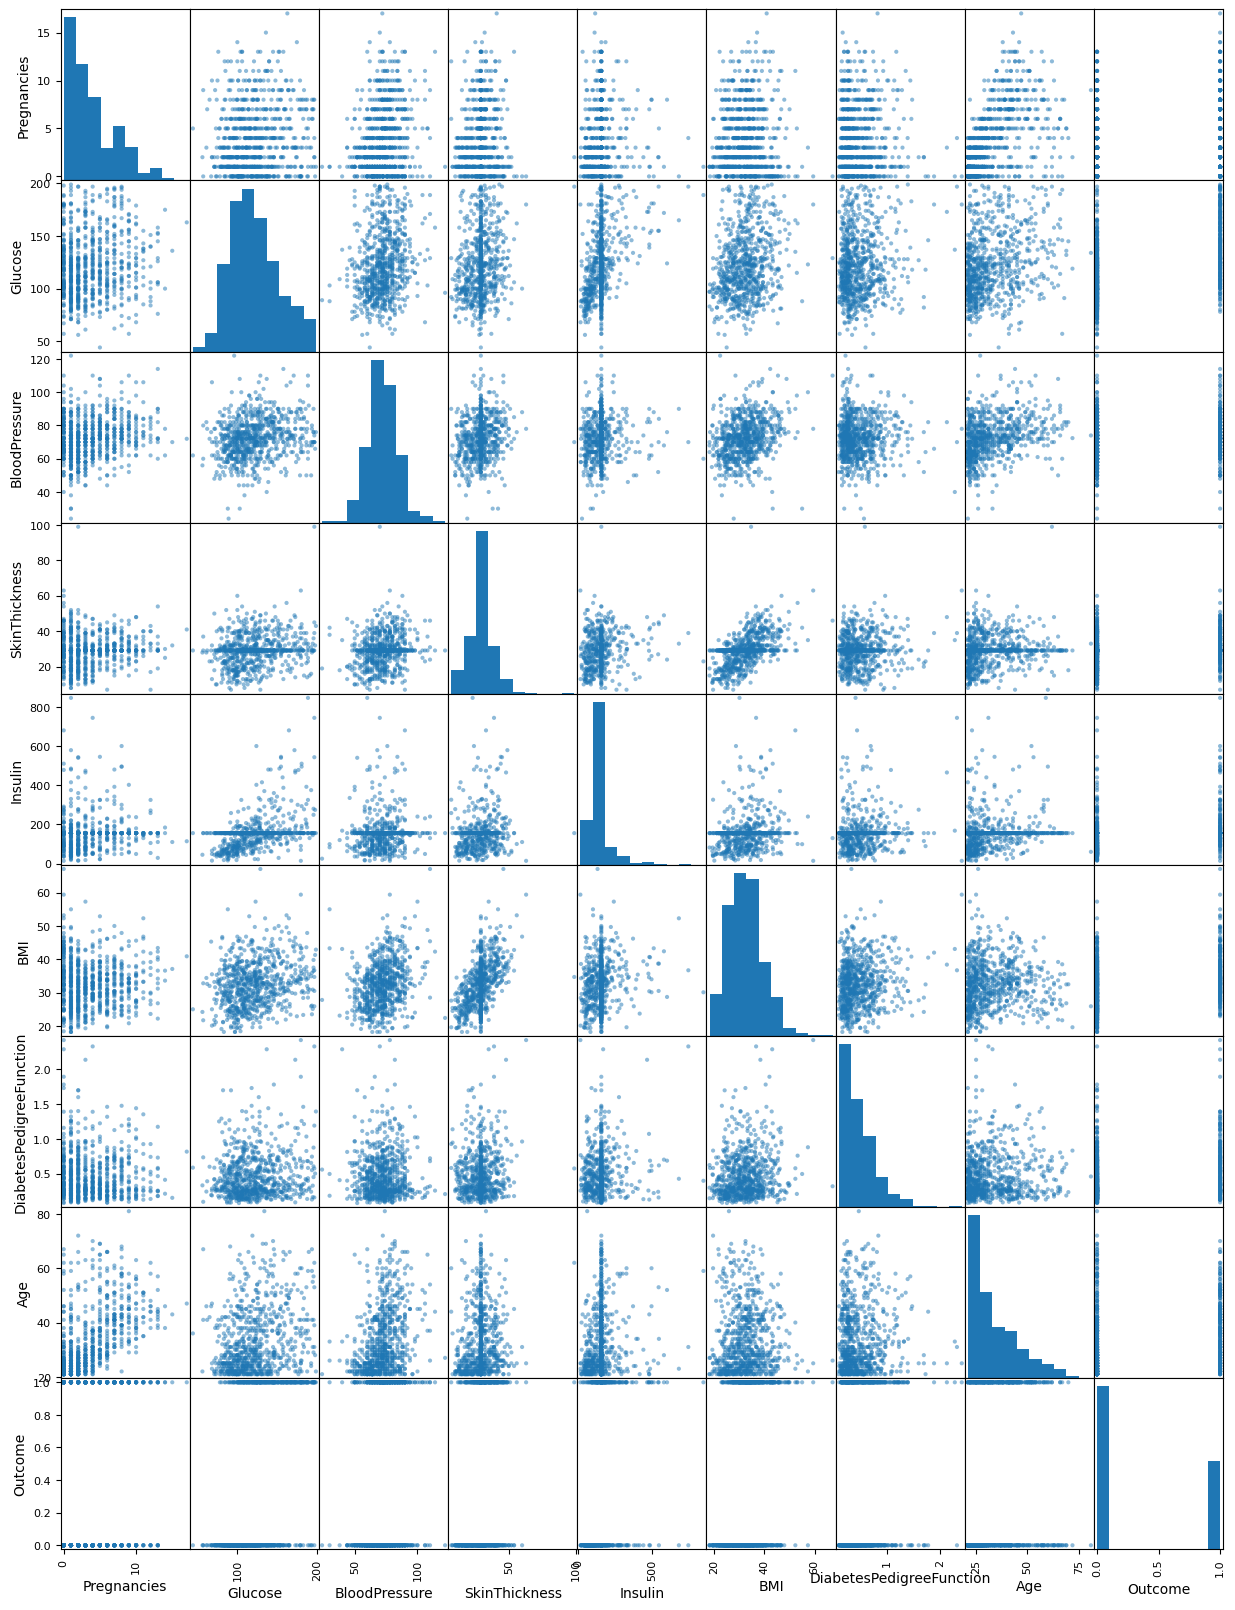

In [59]:
plots = scatter_matrix(data , figsize=(15,20))


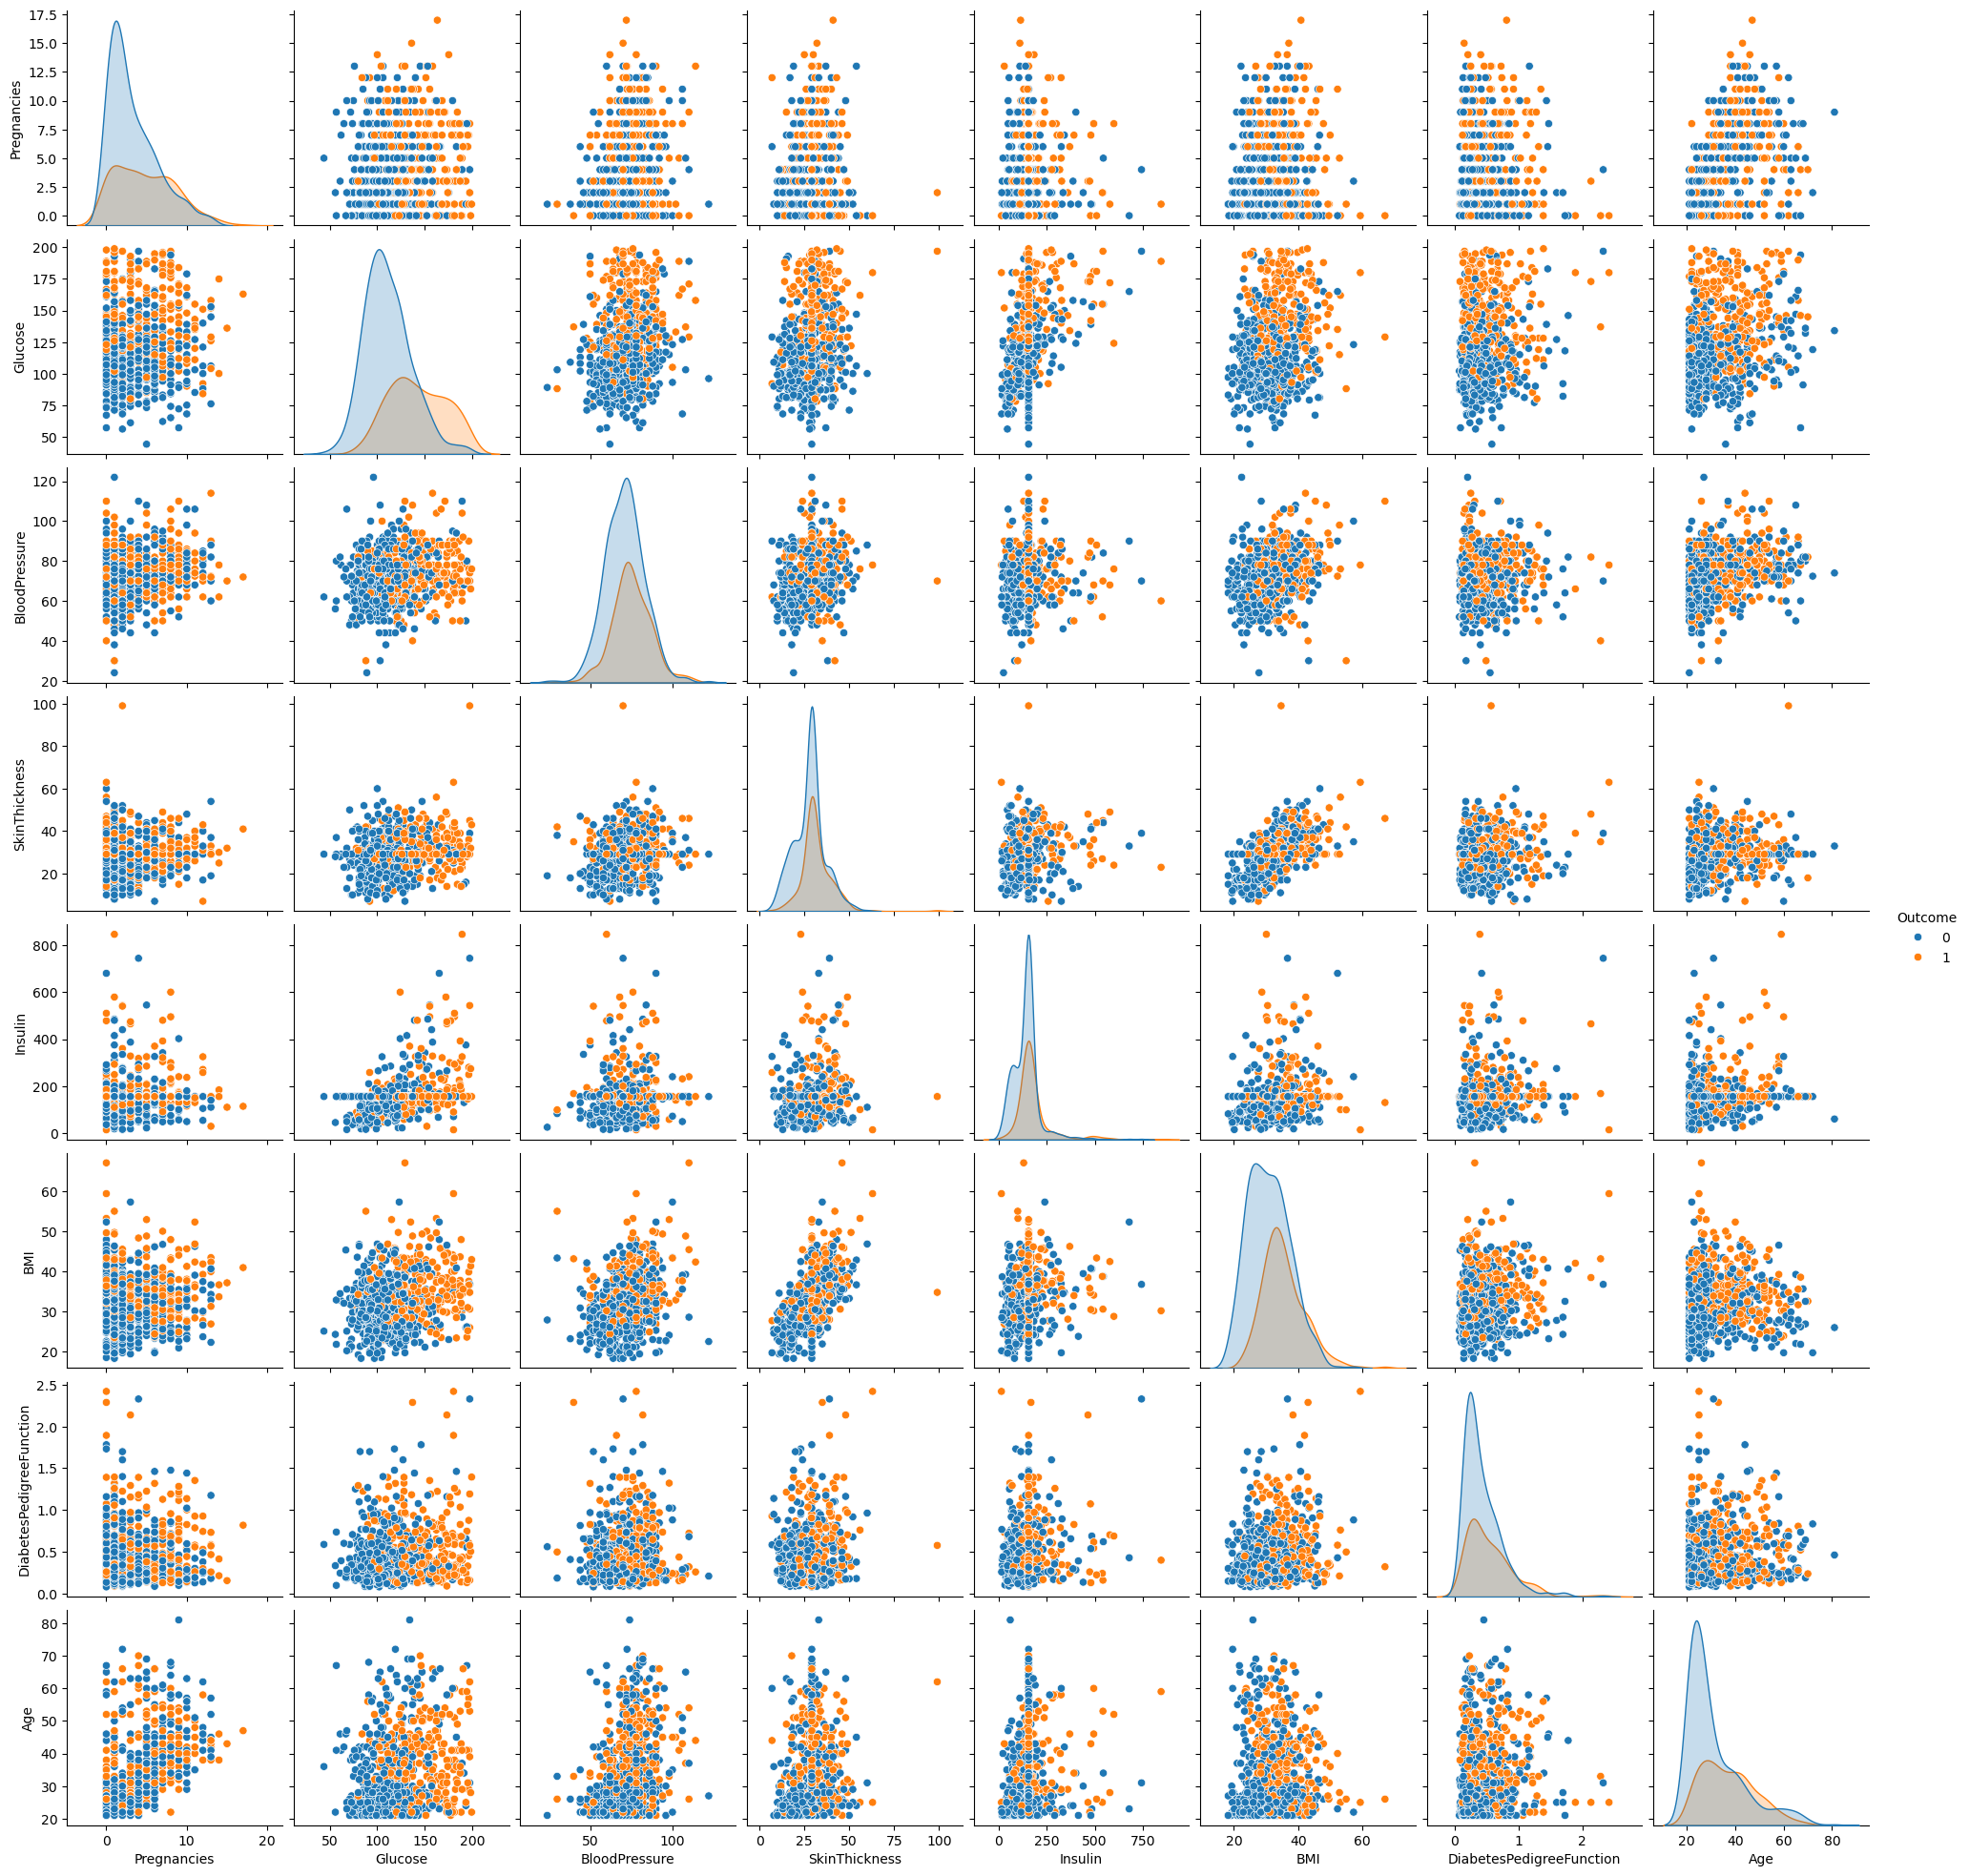

In [61]:
plots = sns.pairplot(data, hue='Outcome')


In [65]:
X = data.iloc[:, :-1].values    
Y = data.iloc[:, -1].values     

In [67]:
scaler = StandardScaler()       


In [69]:
X_Scaler = scaler.fit_transform(X)


In [71]:
X_Scaler


array([[ 0.64098111,  0.85711926, -0.03336514, ...,  0.16553217,
         0.46083924,  1.41667752],
       [-0.84345779, -1.2143719 , -0.52743878, ..., -0.84863705,
        -0.3711646 , -0.19735922],
       [ 1.23475666,  2.00794768, -0.69213   , ..., -1.3267454 ,
         0.59649204, -0.11240992],
       ...,
       [ 0.34409333, -0.03066266, -0.03336514, ..., -0.90658958,
        -0.6907023 , -0.28230852],
       [-0.84345779,  0.1337414 , -1.02151243, ..., -0.34155244,
        -0.37719361,  1.16182961],
       [-0.84345779, -0.9513254 , -0.19805635, ..., -0.29808805,
        -0.47968684, -0.87695364]])

In [73]:
X_train , X_test , Y_train , Y_test = train_test_split(X_Scaler,Y,test_size= 1/3 , random_state=0)


In [75]:
model = svm.SVC(kernel='linear') 

In [77]:
model.fit(X_train,Y_train)


SVC(kernel='linear')

In [79]:
pred_train = model.predict(X_train)
accuracy_score(pred_train,Y_train)
print('Model Accuracy Training Score: {0:0.2f}'. format(accuracy_score(pred_train,Y_train)*100)+ "%")

Model Accuracy Training Score: 77.12%


In [81]:
pred_test = model.predict(X_test)
accuracy_score(pred_test,Y_test)
print('Model Accuracy Test Score: {0:0.2f}'. format(accuracy_score(pred_test,Y_test)*100)+ "%")


Model Accuracy Test Score: 75.98%


In [83]:
features_data = {
    "Pregnancies": [7],
    "Glucose": [134],
    "BloodPressure": [79],
    "SkinThickness": [0],
    "Insulin": [84],
    "BMI": [24.8],
    "DiabetesPedigreeFunction": [0.230],
    "Age": [51]
}

outcome_predict = model.predict(pd.DataFrame(features_data))
print(outcome_predict)

if outcome_predict[0] == 0:
    print("doesn't have Diabetes.")
else:
    print("have Diabetes")

[1]
have Diabetes
